In [0]:
import numpy as np
from skimage import color
import skimage.transform
import matplotlib.pyplot as plt

In [0]:
data = np.loadtxt("sample_data/mnist_test.csv", delimiter=",", dtype=np.float32)[:, :-1]
data = data.reshape(data.shape[0], 28, 28)

In [0]:
test_img = np.copy(data[722])
test_img = color.gray2rgb(test_img)
test_img = test_img / 255

In [4]:
data_copy = np.copy(data)
data_copy = color.gray2rgb(data_copy)
data_copy = data_copy / 255
data_copy.shape

(10000, 28, 28, 3)

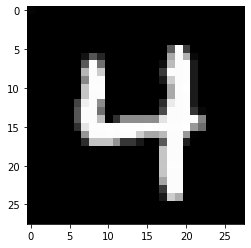

In [5]:
plt.imshow(test_img)

In [0]:
mask = np.zeros((10000, 28, 28))
mask[:, 11:17, 11:17] = 1

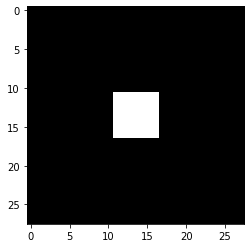

In [7]:
plt.imshow(mask[1], cmap="gray")

In [0]:
def overlay(image, mask, multiplier, threshold: int = 1):
  indices = np.argwhere(mask >= threshold)
  out = np.copy(image)
  for i in range(len(indices)):
    out[indices[i][0], indices[i][1], indices[i][2]] = multiplier
  return out

In [0]:
red_multiplier = [1, 0.2, 0.2]
green_multiplier = [0.35,0.75,0.25]
yellow_multiplier = [1,1,0.25]

In [0]:
seg_img = overlay(data_copy, mask, red_multiplier)

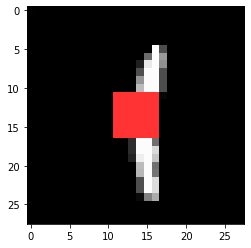

In [11]:
plt.imshow(seg_img[675])

## Checking the `overlay` function with actual data

In [0]:
import os
import glob
os.chdir(r"/content/drive/My Drive/model_server")

In [13]:
! pip install SimpleITK

In [0]:
from model_server.utils.dataset import preprocess_label, load_nii, get_files

out_shape = (80, 96, 64)

In [0]:
def get_dummy_files():
    dir = np.random.choice(glob.glob("data/*GG/*"))
    return get_files(dir.encode("ascii"))

In [0]:
data_files, seg_file = get_dummy_files()

In [0]:
data_imgs = load_nii(data_files)
seg_masks = preprocess_label(load_nii(seg_file)[0])

In [18]:
print(data_imgs.shape)
print(seg_masks.shape)

(4, 155, 240, 240)
(3, 155, 240, 240)


In [19]:
# converting image to rgb
input_img = skimage.transform.resize(data_imgs[0], output_shape=out_shape)
input_img = color.gray2rgb(input_img)
input_img = input_img / input_img.max()
input_img.shape

(80, 96, 64, 3)

In [20]:
mask = np.array([
  skimage.transform.resize(seg_masks[0], out_shape),
  skimage.transform.resize(seg_masks[1], out_shape),
  skimage.transform.resize(seg_masks[2], out_shape)
])
mask.shape

(3, 80, 96, 64)

In [0]:
out = overlay(input_img, mask[0], red_multiplier)
out = overlay(out, mask[1], yellow_multiplier)
out = overlay(out, mask[2], green_multiplier)

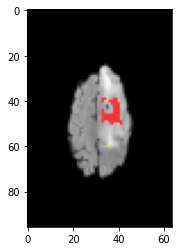

In [29]:
plt.imshow(out[60])

In [59]:
data_imgs.min()

0.0